# ENGR-E 221 Intelligent Systems I Fall 2023

## Lab 6 Clustering with Support Vector Machines (SVC)

### Outline

1) Introduction -- syntax blobs and the basic SVC commands

2) Built in SVM function for classification

3) Rrovide def for plotting decision boundaries

4) Exploring hyper-planes (linear)

5) Build a SVM classifier

6) Introduce the rbf kernel

## Introduction

This weeks lab we will be having fun with support vector machines. Lets start by creating data with blobs (like last week).

What happens when you change the standard deviation of the clusters (cluster_std)?. What are the variables X and y, do we need them both?



The following was recreated from [this website from Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html) and [with notebooks here](https://github.com/jakevdp/PythonDataScienceHandbook). It will be used to visualize our decision boundaries.

In [22]:
# decision function plot

def plot_svc_decision_function(model):
    """Plot the decision function for a 2D SVC"""
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    print(ylim)
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Lets take a look at our data we created with make\_blobs with the decision boundaries included.

How do we know if our model is properly fit (.fit\_status\_)? Take some time to explore the documentation below and learn some of the capabilities of SVC.

Lets take a look at the scikit learn manual page for SVC: [SVC Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Final note - here is how to build and make predictions an SVM using a data-set we created. Just saying...

# **Task 1: SVM for Linear Classification Problems**

Use the blobs function and create a data-set with three centers, build a classifier and test it out (15 minutes).  

1 - Use the previous functions to make the data set
2 - Split data and build classifier
3 - Evaluate model: print predicted labels
4 - Evaluate model: plot original data set and predctions

(Note the boundary plotting function only works with 2 clusters)



[[0.59403094 3.9752316 ]
 [2.37693857 3.57082892]
 [0.70247867 2.96029167]
 ...
 [2.07608912 0.578507  ]
 [1.32551691 3.15160456]
 [1.34657641 4.21670937]]
[0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0
 0 0 0 1 1 1 1 1 0 

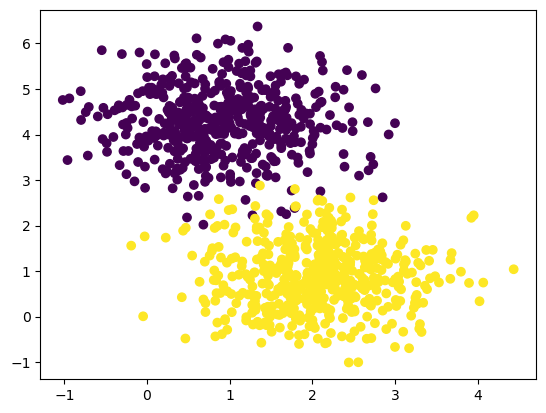

In [32]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=0.75, random_state=0)
print(X)
print(y)
plt.scatter(X[:,0],X[:,1], c=y)

# **Import Libraries**

In [33]:
from sklearn.model_selection import train_test_split

# **Create the dataset make_blobs function**

# **Split the Dataset into training and test sets**

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

# **Train SVM with Training Dataset**

In [35]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=0.001)
model.fit(Xtrain, ytrain)

SVC(C=0.001, kernel='linear')

# **SVM model's perdiction**

In [36]:
pred = model.predict(Xtest)

# **Evaluate SVM Model's Perdiction**

In [37]:
score = pred - ytest
print(score)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]


# **Plot SVM Model on Test Dataset**

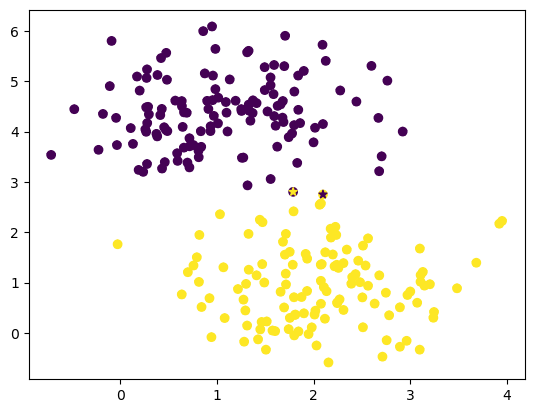

In [38]:
plt.scatter(Xtest[:,0],Xtest[:,1],c=pred)
plt.scatter(Xtest[:,0],Xtest[:,1],marker='*',c=ytest)

# **Define the Data Points that Act as Support Vector**

In [39]:
support_vectors = model.support_vectors_
support_vectors

array([[ 0.67154273,  3.65575358],
       [ 2.3886331 ,  3.29296803],
       [ 2.36346351,  4.14316234],
       [ 1.00524299,  3.061251  ],
       [ 2.0272787 ,  3.99600098],
       [ 0.59725134,  3.69194367],
       [ 0.99206659,  4.37837817],
       [ 1.45636872,  3.09107029],
       [ 2.56386334,  3.09562852],
       [ 0.59403094,  3.9752316 ],
       [ 0.89801246,  3.56278587],
       [ 2.37693857,  3.57082892],
       [ 1.44519367,  3.10224409],
       [ 1.17964772,  3.70266466],
       [ 0.62374542,  4.14123872],
       [ 1.35669929,  4.21661505],
       [ 1.68833568,  4.36945076],
       [ 0.5669861 ,  2.89034794],
       [ 0.52828303,  4.12534603],
       [ 1.00609513,  3.12854129],
       [ 0.59563188,  3.51487725],
       [ 0.93233017,  4.06563001],
       [ 0.48392232,  2.17787145],
       [ 1.82271563,  4.67578804],
       [ 0.0165032 ,  3.86471392],
       [ 1.15785855,  3.63724713],
       [ 0.41770396,  3.68395842],
       [ 0.69824208,  3.59457548],
       [ 1.01448579,

# **Create the Margin for SVM Perdiction**

(-0.9216158770751164, 6.4232016845745505)


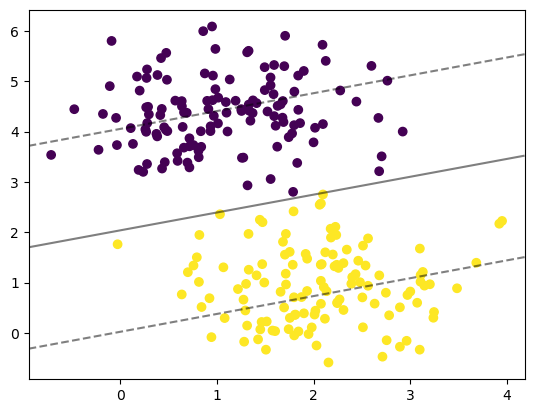

In [40]:
plt.scatter(Xtest[:,0],Xtest[:,1], c=pred)
plot_svc_decision_function(model)
plt.show()

# **Changing C**
Changing see increases the margins and lets more into the "in-between" zone.

# **Task 2: SVM for Non-linear Classification Problems**

What happens when we cannot draw lines through our data?

We can use kernels, here we introduce the rbf kernel.

Task - make data set, train SVM using the rbf, visualize margins, decision boundary, and data to evaluate classifier.


# **Create the dataset make_circles function**

What kind of real world data could may look similar to this?


### Discussion

How does this model do? Conduct a visual inspection.

# **Create the dataset make_circle function**

(-1.0, 1.0)

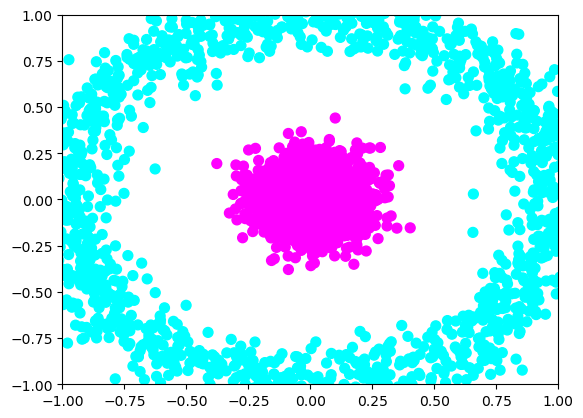

In [58]:
from sklearn.datasets import make_circles
X, y= make_circles(3000, factor=0.1,noise =0.1)
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='cool')
plt.xlim(-1,1)
plt.ylim(-1,1)

## **Split the Dataset into training and test sets**

In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

# **Train SVM with (RBF kernel) on Training Dataset**

In [60]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1E10)
model.fit(Xtrain, ytrain)

SVC(C=10000000000.0)

# **SVM model's perdiction**

In [61]:
pred = model.predict(Xtest)

# **Evaluate SVM Model's Perdiction**

In [62]:
score = pred - ytest
print(score)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# **Define the Data Points that Act as Support Vector**

In [63]:
support_vectors = model.support_vectors_
support_vectors

array([[ 0.65742325,  0.02948574],
       [ 0.38204799,  0.59866509],
       [-0.37575939,  0.61886948],
       [-0.62584444,  0.16522606],
       [ 0.65547608, -0.17797931],
       [ 0.20039886, -0.71394958],
       [-0.37716018,  0.19442569],
       [ 0.40271944, -0.15348244],
       [ 0.1004135 ,  0.44073072]])

# **Plot SVM Model on Test Dataset**

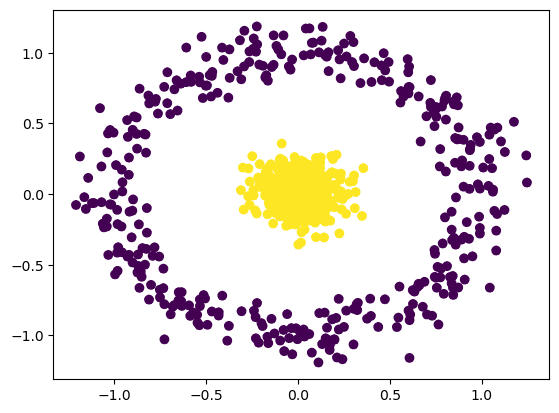

In [64]:
plt.scatter(Xtest[:,0],Xtest[:,1],c=pred)
plt.scatter(Xtest[:,0],Xtest[:,1],marker='*',c=ytest)

# **Create the Margin for SVM Perdiction**

(-1.3109750061975884, 1.3045713463686717)


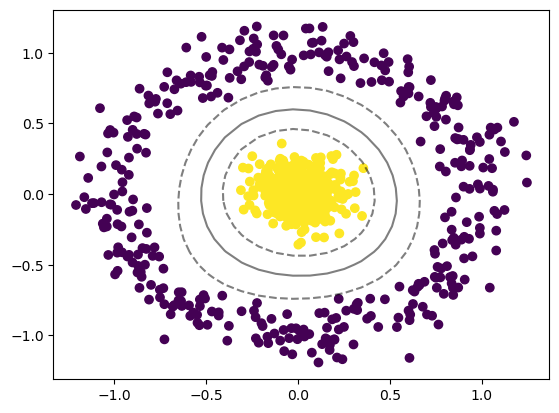

In [65]:
plt.scatter(Xtest[:,0],Xtest[:,1], c=pred)
plot_svc_decision_function(model)
plt.show()

# **Changing C**
Changing see increases the margins and lets more into the "in-between" zone.